# FINAL MODEL

In [2]:
#! pip install sqlalchemy
#! pip install pymysql
#! pip install pandas
#! pip install matplotlib
#! pip install ipython
#! pip install PrettyTable
#! pip install fpdf
#! pip install yagmail
#! pip install plotly
#! pip install geopy
#! pip install selenium
#! pip install webdriver-manager
#! pip install Pillow
#! pip install requests
#! pip install python-dotenv
#! pip install google-generativeai
#! pip install nbformat

In [1]:
import subprocess

# List of modules to check
modules = [
    'sqlalchemy', 'pymysql', 'pandas', 'matplotlib', 'ipython', 'PrettyTable',
    'fpdf', 'yagmail', 'plotly', 'geopy', 'selenium', 'webdriver-manager',
    'Pillow', 'requests', 'python-dotenv', 'google-generativeai','nbformat'
]

# Function to check if a module is installed
def check_module(module):
    try:
        subprocess.check_output(['pip', 'show', module])
        print(f"{module} is installed.")
    except subprocess.CalledProcessError:
        print(f"{module} is NOT installed.")

# Check all modules
for module in modules:
    check_module(module)


sqlalchemy is installed.
pymysql is installed.
pandas is installed.
matplotlib is installed.
ipython is installed.
PrettyTable is installed.
fpdf is installed.
yagmail is installed.
plotly is installed.
geopy is installed.
selenium is installed.
webdriver-manager is installed.
Pillow is installed.
requests is installed.
python-dotenv is installed.
google-generativeai is installed.
nbformat is installed.


Initial Price => 5000
Price After Room Type Adjustment => 6000 (+20.00%)
Price After Weekend Surge Charge => 6000 (No Change)
Price After Summer Season Adjustment => 6000 (No Change)
Price After Festive Period Amendments => 7350 (+22.50%)
Price after Smart Booking Optimization => 6247 (-15.01%)
Price After Room Availability Charge => 7371 (+18.00%)
Price After Loyalty Discount => 5896 (-20.01%)
Price After Special Offer Period => 5896 (No Change)
Price After Peak-Load Pricing => 5306 (-10.01%)
PDF saved as Booking_Info_2.pdf
Booking info sucessfully mailed to utkarsh.roy25@gmail.com!

Booking Information:
+---------------+-------------------------+
|     Field     |           Data          |
+---------------+-------------------------+
|      Name     |       Utkarsh Roy       |
|    Address    |          India          |
|     Email     | utkarsh.roy25@gmail.com |
|     Phone     |        7304734925       |
| Check-in Date |   2024-12-25 05:33:05   |
|  Room Number  |            31    

,id,room_no,price,room_type,currently_booked,created_at
0,31,31,5306,D,0,2024-08-11 17:36:45


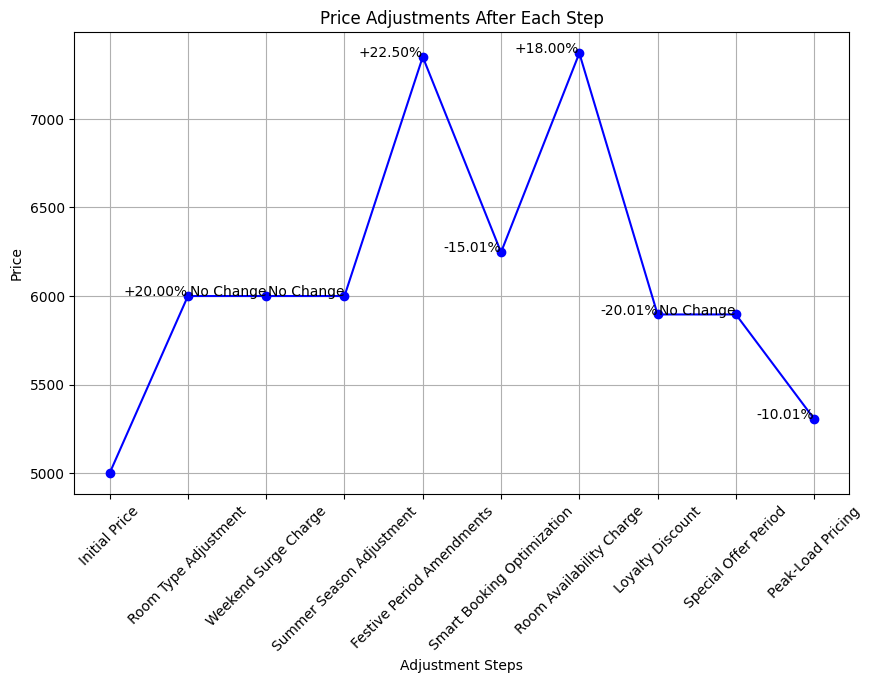


Following Operations are available:
+--------+----------------------------------------------------+
| Option |                    Description                     |
+--------+----------------------------------------------------+
|   1    |       Room Price Computation (New Bookings)        |
|   2    | Booking Receipt Generation (On Completion of Stay) |
|   3    |              View SmartStay Analytics              |
|   4    |        Export Full Analytics Report to PDF         |
|   5    |                        Exit                        |
+--------+----------------------------------------------------+
Exited successfully!


In [1]:
from sqlalchemy import create_engine, Column, Integer, String, Boolean, DateTime, ForeignKey, func, extract, text 
from sqlalchemy.orm import declarative_base, sessionmaker, relationship 
import datetime
import time
import pandas as pd
import plotly.graph_objs as go 
import plotly.express as px
from fpdf import FPDF 
import plotly.io as pio 
import matplotlib.pyplot as plt 
import os
import random
import numpy as np 
import PIL 
from PIL import Image 
from selenium import webdriver 
from selenium.webdriver.chrome.service import Service 
from selenium.webdriver.chrome.options import Options 
from webdriver_manager.chrome import ChromeDriverManager 
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
import yagmail  
import requests 
import csv
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from geopy.geocoders import Nominatim  # To convert city names to coordinates
from prettytable import PrettyTable 
from io import StringIO
from IPython.display import display, clear_output 
from dotenv import load_dotenv 
import google.generativeai as genai

# Configure generative AI API key
genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

# Load environment variables
load_dotenv()

# Database connection parameters
username = 'root'
password = 'iamukr77'
host = 'localhost'
port = '3306'  # Default MySQL port
database = 'smartstay'  # Your schema name

# Create an engine instance with provided credentials
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

# Define the ORM base class
Base = declarative_base()

# Define the ORM mapping for the rooms table
class Room(Base):
    __tablename__ = 'rooms'
    id = Column(Integer, primary_key=True, autoincrement=True)
    room_no = Column(Integer, unique=True)
    price = Column(Integer)
    room_type = Column(String(2))
    currently_booked = Column(Boolean, default=False)
    created_at = Column(DateTime, default=datetime.datetime.utcnow)

    reservations = relationship("Reservation", back_populates="room")

# Define the ORM mapping for the reservations table
class Reservation(Base):
    __tablename__ = 'reservations'
    id = Column(Integer, primary_key=True, autoincrement=True)
    g_id = Column(Integer, ForeignKey('guests.id'))
    r_date = Column(DateTime)
    check_in = Column(DateTime)
    check_out = Column(DateTime)
    meal = Column(Boolean)
    r_id = Column(Integer, ForeignKey('rooms.id'))
    r_type = Column(String(2))
    created_at = Column(DateTime, default=datetime.datetime.utcnow)

    guest = relationship("Guest", back_populates="reservations")
    room = relationship("Room", back_populates="reservations")

# Define the ORM mapping for the guests table
class Guest(Base):
    __tablename__ = 'guests'
    id = Column(Integer, primary_key=True, autoincrement=True)
    name = Column(String(30))
    address = Column(String(50))
    email_id = Column(String(50))
    phone = Column(Integer)
    city = Column(String(20))
    created_at = Column(DateTime, default=datetime.datetime.utcnow)

    reservations = relationship("Reservation", back_populates="guest")

# Define the ORM mapping for the loyalty table
class Loyalty(Base):
    __tablename__ = 'loyalty'
    id = Column(Integer, primary_key=True, autoincrement=True)
    guest_id = Column(Integer, ForeignKey('guests.id'))
    email_id = Column(String(50), default=None)
    created_at = Column(DateTime, default=datetime.datetime.utcnow)

Session = sessionmaker(bind=engine)
session = Session()


def main():
    while True:
        table = PrettyTable()
        table.field_names = ["Option", "Description"]
        table.add_row(["1", "Room Price Computation (New Bookings)"])
        table.add_row(["2", "Booking Receipt Generation (On Completion of Stay)"])
        table.add_row(["3", "View SmartStay Analytics"])
        table.add_row(["4", "Export Full Analytics Report to PDF"])
        table.add_row(["5", "Exit"])

        print("\nFollowing Operations are available:")
        print(table)
        
        choice = input("Enter your choice (1/2/3/4/5): ")

        if choice == '1':
            room_price_computation()  # Function for Room price computation 
        elif choice == '2':
            room_no_input = input("Enter the room number: ")
            session = Session()
            fetch_reservation_and_calculate(int(room_no_input), session)  # Function for receipt generation
        elif choice == '3':
            view_Analytics()  # Function for viewing analytics
        elif choice == '4':
            report_export()
        elif choice == '5':
            print("Exited successfully!")
            break  
        else:
            print("Invalid choice. Please enter 1/2/3/4/5")


# function for room price computation (Option 1)
def room_price_computation():
    
    # Function to apply Early Bird Discount and Late Minute Price Surge
    def early_and_late(current_price, reservation):
        previous_price = current_price
    
        # Calculate days between reservation creation and check-in date
        days_in_advance = abs((reservation.check_in - reservation.created_at).days)
    
        # Apply Early Bird Discount
        if days_in_advance >= 90:
            discount = 0.10 + (days_in_advance - 90) / 10 * 0.05  # 10% - 15% discount
            current_price = int(current_price * (1 - min(discount, 0.15)))
    
        # Apply Late Minute Price Surge
        if days_in_advance < 3:
            surge = 0.10 + (3 - days_in_advance) / 3 * 0.10  # 10% - 20% increase
            current_price = int(current_price * (1 + min(surge, 0.20)))
    
        percentage_change = ((current_price - previous_price) / previous_price) * 100
        sign = "+" if percentage_change > 0 else ""
        print(f"Price after Smart Booking Optimization => {current_price} ({sign}{percentage_change:.2f}%)")
        return current_price, f"{sign}{percentage_change:.2f}%" if percentage_change != 0 else "No Change"

    # Function to calculate dynamic price based on room type, weekends, and summer season
    def calculate_dynamic_price(room, reservation):
        prices = []
        labels = []
        changes = []
    
        base_price = 5000  # Example base price
        prices.append(base_price)
        labels.append('Initial Price')
        changes.append('')
        print(f"Initial Price => {base_price}")

        # Adjust price based on room type
        previous_price = base_price
        if room.room_type == 'D':  # Deluxe room
            base_price += 1000
        elif room.room_type == 'N':  # Normal room
            base_price += 500
    
        percentage_change = ((base_price - previous_price) / previous_price) * 100
        prices.append(base_price)
        labels.append('Room Type Adjustment')
        changes.append(f"+{percentage_change:.2f}%" if percentage_change != 0 else "No Change")
        print(f"Price After Room Type Adjustment => {base_price} ({changes[-1]})")
    
        # Check if the check_in date was a weekend
        previous_price = base_price
        created_at_date = reservation.check_in
        is_weekend_flag = created_at_date.weekday() >= 5  # 5 represents Saturday, 6 represents Sunday

        if is_weekend_flag:
            base_price *= 1.05  # Increase price by 5% for rooms created on weekends

        percentage_change = ((base_price - previous_price) / previous_price) * 100
        prices.append(int(base_price))
        labels.append('Weekend Surge Charge')
        changes.append(f"+{percentage_change:.2f}%" if percentage_change != 0 else "No Change")
        print(f"Price After Weekend Surge Charge => {int(base_price)} ({changes[-1]})")
    
        # Check if the created_at date falls within the summer season (March and April)
        previous_price = base_price
        if created_at_date.month in [3, 4]:
            base_price *= 1.15  # Increase price by 15% for rooms booked during the summer season
    
        percentage_change = ((base_price - previous_price) / previous_price) * 100
        prices.append(int(base_price))
        labels.append('Summer Season Adjustment')
        changes.append(f"+{percentage_change:.2f}%" if percentage_change != 0 else "No Change")
        print(f"Price After Summer Season Adjustment => {int(base_price)} ({changes[-1]})")

        # Special high price periods with linear interpolation
        high_price_periods = [
        (datetime.datetime(2024, 1, 13), datetime.datetime(2024, 1, 15), 1.20, 1.30),  # Makar Sankranti (Long weekend)
        (datetime.datetime(2024, 3, 8), datetime.datetime(2024, 3, 8), 1.20, 1.30),  # Holi
        (datetime.datetime(2024, 4, 7), datetime.datetime(2024, 4, 10), 1.20, 1.30),  # Good Friday & Easter Weekend
        (datetime.datetime(2024, 10, 11), datetime.datetime(2024, 10, 15), 1.20, 1.30),  # Navratri and Dussehra
        (datetime.datetime(2024, 12, 23), datetime.datetime(2024, 12, 31), 1.20, 1.30),   # Christmas to New Year’s Eve
        ]

        # Apply high price adjustments based on special periods
        for start_date, end_date, min_multiplier, max_multiplier in high_price_periods:
            if start_date <= created_at_date <= end_date:
                # Calculate the fraction of the period that has passed
                total_period = (end_date - start_date).days
                days_passed = (created_at_date - start_date).days
                fraction_passed = days_passed / total_period
            
                # Linearly interpolate price based on the fraction of the period passed
                current_multiplier = min_multiplier + (max_multiplier - min_multiplier) * fraction_passed
                previous_price = base_price
                base_price *= current_multiplier
                percentage_change = ((base_price - previous_price) / previous_price) * 100
                prices.append(int(base_price))
                labels.append('Festive Period Amendments')
                changes.append(f"+{percentage_change:.2f}%" if percentage_change != 0 else "No Change")
                print(f"Price After Festive Period Amendments => {int(base_price)} ({changes[-1]})")
                break  # Exit loop after Festive Periiod adjustment
    
        return int(base_price), prices, labels, changes

    # Function to check if the room is booked
    def is_room_booked(room_no, session):
        reservation = session.query(Reservation).join(Room).filter(Room.room_no == room_no, Reservation.check_out == None).first()
        return reservation is not None

    # Function to apply dynamic price based on room availability
    def update_room_price(room_no, session, current_price):
        previous_price = current_price
        if is_room_booked(room_no, session):
            current_price *= 1.18  # Increase price by 18%
    
        percentage_change = ((current_price - previous_price) / previous_price) * 100
        print(f"Price After Room Availability Charge => {int(current_price)} ({f'+{percentage_change:.2f}%' if percentage_change != 0 else 'No Change'})")
        return int(current_price), f"+{percentage_change:.2f}%" if percentage_change != 0 else "No Change"

    # Function to apply loyalty discount
    def apply_loyalty_discount(current_price, guest, session):
        previous_price = current_price

        # Check if the guest's email_id is in the loyalty table
        loyalty_member = session.query(Loyalty).filter_by(email_id=guest.email_id).first()

        if loyalty_member:
            current_price = int(current_price * 0.8)  # Apply 20% discount

        percentage_change = ((current_price - previous_price) / previous_price) * 100
        print(f"Price After Loyalty Discount => {current_price} ({f'{percentage_change:.2f}%' if percentage_change != 0 else 'No Change'})")
        return current_price, f"{percentage_change:.2f}%" if percentage_change != 0 else "No Change"
 

    # Function to apply special offer period specific date
    def apply_special_offer(current_price, reservation):
        previous_price = current_price
        offer_start_date = datetime.datetime(2024, 4, 20)
        offer_end_date = datetime.datetime(2024, 4, 30)
    
        if offer_start_date <= reservation.check_in <= offer_end_date:
            current_price = int(current_price * 0.93)  # Apply 7% discount

    # Function to apply special offer period specific date
    def apply_special_offer(current_price, reservation):
        previous_price = current_price
        offer_start_date = datetime.datetime(2024, 4, 20)
        offer_end_date = datetime.datetime(2024, 4, 30)
        if offer_start_date <= reservation.check_in <= offer_end_date:
            current_price = int(current_price * 0.93)  # Apply 7% discount

        # Discount periods for holidays
        holiday_discounts = [
        (datetime.datetime(2024, 2, 1), datetime.datetime(2024, 2, 28), 0.85, 0.75),  # February discount range
        (datetime.datetime(2024, 7, 15), datetime.datetime(2024, 9, 7), 0.85, 0.75),  # Mid-July to Early September discount range
        (datetime.datetime(2024, 11, 1), datetime.datetime(2024, 11, 30), 0.85, 0.75),  # After Diwali discount range

        ]

        # Apply discounts based on holiday periods
        for start_date, end_date, min_discount, max_discount in holiday_discounts:
            if start_date <= reservation.check_in <= end_date:
                # Calculate the fraction of the period that has passed
                total_period = (end_date - start_date).days
                days_passed = (reservation.check_in - start_date).days
                fraction_passed = days_passed / total_period
            
                # Linearly interpolate discount based on the fraction of the period passed
                current_discount = min_discount + (max_discount - min_discount) * fraction_passed
                current_price = int(current_price * current_discount)
                break  # Exit loop after applying discount
    
        percentage_change = ((current_price - previous_price) / previous_price) * 100
        print(f"Price After Special Offer Period => {current_price} ({f'{percentage_change:.2f}%' if percentage_change != 0 else 'No Change'})")
        return current_price, f"{percentage_change:.2f}%" if percentage_change != 0 else "No Change"

    def apply_peak_load_pricing(current_price, total_rooms, vacant_rooms):
        previous_price = current_price

        # Calculate occupancy rate
        occupancy_rate = ((total_rooms - vacant_rooms) / total_rooms) * 100

        # Set thresholds and percentage adjustments
        low_occupancy_threshold = 25
        high_occupancy_threshold = 85  # or 90.0 based on your preference
        low_occupancy_decrease = 0.90    # Decrease by 10% if occupancy is below the low threshold
        high_occupancy_increase = 1.15   # Increase by 15% if occupancy is above the high threshold

        # Adjust prices based on occupancy rate
        if occupancy_rate <= low_occupancy_threshold:
            current_price = int(current_price * low_occupancy_decrease)
        elif occupancy_rate >= high_occupancy_threshold:
            current_price = int(current_price * high_occupancy_increase)

        percentage_change = ((current_price - previous_price) / previous_price) * 100
        sign = "+" if percentage_change > 0 else ""
        print(f"Price After Peak-Load Pricing => {current_price} ({f'{sign}{percentage_change:.2f}%' if percentage_change != 0 else 'No Change'})")
        return current_price, f"{sign}{percentage_change:.2f}%" if percentage_change != 0 else "No Change"

    # Function to fetch and display guest information along with reservation and room details
    def get_guest_info(guest_id, session, final_price, prices, labels, changes):
        guest = session.query(Guest).filter_by(id=guest_id).first()
        reservation = session.query(Reservation).filter_by(g_id=guest_id, check_out=None).first()
        room = session.query(Room).filter_by(id=reservation.r_id).first() if reservation else None
    
        current_time = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    
        if guest and reservation and room:
            # Create a PrettyTable instance
            table = PrettyTable()
            table.field_names = ["Field", "Data"]
            table.max_width["Field"] = 20
            table.max_width["Data"] = 50
            table.add_row(["Name", guest.name])
            table.add_row(["Address", guest.address])
            table.add_row(["Email", guest.email_id])
            table.add_row(["Phone", guest.phone])
            table.add_row(["Check-in Date", reservation.check_in.strftime('%Y-%m-%d %H:%M:%S')])
            table.add_row(["Room Number", room.room_no])
            table.add_row(["Room Type", room.room_type])
            table.add_row(["Room Price", final_price])
            table.add_row(["Booking Time", current_time])
        
            # Save PrettyTable data to PDF
            save_table_to_pdf(guest.id, session, final_price, prices, labels, changes)
        
            print("\nBooking Information:")
            print(table)
        else:
            print(f"No guest or reservation found with ID {guest_id}")

    # Function to display animated calculation steps
    def display_price_calculation_animation():
        messages = [
            "\033[1mVerifying base price...🔎\033[0m",
            "\033[1mAdjusting price based on room type...🏡\033[0m",
            "\033[1mChecking for weekend surge charge...🚀\033[0m",
            "\033[1mReviewing Seasonal & Festive adjustment...⛱️\033[0m",
            "\033[1mSmart Booking Optimization...🚨\033[0m",
            "\033[1mApplying loyalty discount...🎁\033[0m",
            "\033[1mCalculating special offer discount...🌟\033[0m",
            "\033[1mMonitoring Demand & Room Occupancy...📊\033[0m",
            "\033[1mDone!✅\033[0m",
            "\033[1mDisplaying Final Price with the Breakdown..💻\033[0m"
            ]
        for message in messages:
            clear_output(wait=True)
            print(message)
            time.sleep(1)  
        clear_output(wait=True)

    # Function to save PrettyTable data to PDF
    class PDF(FPDF):
        def header(self):
            self.set_font('Arial', 'B', 12)
            self.cell(0, 10, '        Booking Information', 0, 1, 'C')

        def chapter_title(self, title):
            self.set_font('Arial', 'B', 12)
            self.cell(0, 10, title, 0, 1, 'L')
            self.ln(5)

        def chapter_body(self, body):
            self.set_font('Arial', '', 12)
            self.multi_cell(0, 10, body)
            self.ln()

        def add_table(self, table):
            self.set_font('Arial', 'B', 12)
            col_widths = [self.get_string_width(col) for col in table.field_names]
            col_widths = [max(w, 80) for w in col_widths]  # Minimum column width
            # Header
            for i, field in enumerate(table.field_names):
                self.cell(col_widths[i], 10, field, 1, 0, 'C')
            self.ln()

            # Data
            self.set_font('Arial', '', 12)
            for row in table.rows:
                for i, field in enumerate(row):
                    self.cell(col_widths[i], 10, str(field), 1, 0, 'C')
                self.ln()

        def add_narrow_table(self, table):
            self.set_font('Arial', 'B', 12)
            col_widths = [self.get_string_width(col) for col in table.field_names]
            col_widths = [max(w, 58) for w in col_widths]  # Minimum column width

            # Header
            for i, field in enumerate(table.field_names):
                self.cell(col_widths[i], 10, field, 1, 0, 'C')
            self.ln()

            # Data
            self.set_font('Arial', '', 12)
            for row in table.rows:
                for i, field in enumerate(row):
                    self.cell(col_widths[i], 10, str(field), 1, 0, 'C')
                self.ln()

        def add_page_title(self, title):
            self.add_page()
            self.set_font('Arial', 'B', 14)
            self.cell(0, 10, title, 0, 1, 'C')
            self.ln(10)

    def save_table_to_pdf(guest_id, session, final_price, prices, labels, changes):
        guest = session.query(Guest).filter_by(id=guest_id).first()
        reservation = session.query(Reservation).filter_by(g_id=guest_id, check_out=None).first()
        room = session.query(Room).filter_by(id=reservation.r_id).first() if reservation else None

        if guest and reservation and room:
            # Create a PrettyTable instance for the data
            table = PrettyTable()
            table.field_names = ["Field", "Data"]

            # Data to be added
            data = [
                ["Name", guest.name],
                ["Address", guest.address],
                ["Email", guest.email_id],
                ["Phone", guest.phone],
                ["Check-in Date", reservation.check_in.strftime('%Y-%m-%d %H:%M:%S')],
                ["Room Number", room.room_no],
                ["Room Type", "Delux" if room.room_type=='D' else 'Normal'],
                ["Room Price", final_price],
                ["Time Booked At", datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')]
            ]

            # Add rows to the table
            for row in data:
                table.add_row(row)

            # Calculate max width based on content length
            table.max_width["Field"] = max(len(row[0]) for row in data) + 5  # +5 for padding
            table.max_width["Data"] = max(len(str(row[1])) for row in data) + 5  # +5 for padding

            # Create the PDF
            pdf = PDF()
            pdf.add_page()

            # Add header and introductory text
            pdf.set_font("Arial", 'B', 16)
            pdf.cell(200, 10, txt="SmartStay", ln=True, align='C')
            pdf.set_font("Arial", 'I', 12)
            pdf.cell(200, 10, txt="Your Booking Confirmation!", ln=True, align='C')
            pdf.ln(10)

            # Add introduction
            pdf.set_font("Arial", '', 12)
            pdf.multi_cell(0, 10, 
                "Dear {name},\n\n"
                "Thank you for choosing our hotel for your stay. We are pleased to confirm your booking and "
                "hope you have a pleasant experience with us. Below are the details of your reservation.\n\n".format(name=guest.name)
            )
        
            # Add table with booking information
            pdf.add_table(table)

            # Adding Terms & Conditions, edit it if you find some interesting ones  
            pdf.ln(10)
            pdf.set_font("Arial", 'B', 12)
            pdf.cell(0, 10, 'Terms & Conditions:', 0, 1)
            pdf.set_font("Arial", '', 10)
            pdf.multi_cell(0, 10,
                "1. Prices are subject to change based on SmartStay's Policies.\n"
                "2. All guests are required to provide a valid ID proof at the time of check-in.\n"
                "3. Cancellations made within 24 hours of check-in will incur a 50% charge.\n"
                "4. Pets are not allowed in the hotel premises.\n"
                "5. The hotel is not responsible for the loss of any personal belongings.\n"
            )

            # Add the second page for the dynamic pricing breakdown
            pdf.add_page()
            pdf.chapter_title("Dynamic Pricing Breakdown")
            breakdown_table = PrettyTable()
            breakdown_table.field_names = ["Step", "Price After Step", "% Change"]

            for label, price, change in zip(labels, prices, changes):
                breakdown_table.add_row([label, price, change])
        
            pdf.add_narrow_table(breakdown_table)

            # Add footer
            pdf.ln(10)
            pdf.set_font("Arial", 'I', 10)
            pdf.multi_cell(0, 10,
                "For any inquiries or additional assistance, please contact us at smartstaytcet@gmail.com or call us at (123) 456-7890.\n"
                "We look forward to welcoming you to our hotel.\n\n"
                "Sincerely,\nSmartStay Team"
            )

            # Save the PDF
            pdf_file_name = f"Booking_Info_{guest_id}.pdf"
            pdf.output(pdf_file_name)

            print(f"PDF saved as {pdf_file_name}")
        
            # Send the PDF via email
            try:
                yag = yagmail.SMTP("smartstaytcet@gmail.com", "vmla cyse ruho svsc")
                subject = "Your Booking Information"
                body = "Dear Guest,\n\nPlease find attached your booking information.\n\nBest Regards,\nSmartStay Team"
                yag.send(to=guest.email_id, subject=subject, contents=body, attachments=pdf_file_name)
                print(f"\033[1mBooking info sucessfully mailed to {guest.email_id}!\033[0m")
            except Exception as e:
                print(f"Failed to send email: {e}")
        else:
            print("No guest or reservation found.")

    # Main function
    def update_room_price_main():
        try:
            # Create a session
            session = Session()
        
            # Take room number input from the user
            room_number_to_update = int(input("Enter the room number to update: "))
        
            # Fetch the room with the specific room_no
            room = session.query(Room).filter_by(room_no=room_number_to_update).first()
    
            if room:
                # Fetch the reservation associated with the room
                reservation = session.query(Reservation).filter_by(r_id=room.id, check_out=None).first()
    
                if reservation:
                    # Fetch the guest associated with the reservation
                    guest = session.query(Guest).filter_by(id=reservation.g_id).first()
                
                    # Display the price calculation animation
                    display_price_calculation_animation()

                    # Calculate the new dynamic price
                    new_price, prices, labels, changes = calculate_dynamic_price(room, reservation)

                    # Apply Early Bird Discount and Late Minute Price Surge
                    new_price, change = early_and_late(new_price, reservation)
                    prices.append(new_price)
                    labels.append('Smart Booking Optimization')
                    changes.append(change)

                    # Apply dynamic price based on room availability
                    new_price, change = update_room_price(room.room_no, session, new_price)
                    prices.append(new_price)
                    labels.append('Room Availability Charge')
                    changes.append(change)
    
                    # Apply loyalty discount if applicable
                    new_price, change = apply_loyalty_discount(new_price, guest, session)
                    prices.append(new_price)
                    labels.append('Loyalty Discount')
                    changes.append(change)
                
                    # Apply special offer period specific date
                    new_price, change = apply_special_offer(new_price, reservation)
                    prices.append(new_price)
                    labels.append('Special Offer Period')
                    changes.append(change)

                    # query to get total number of rooms
                    result = session.execute(text("SELECT COUNT(*) FROM rooms"))
                    total_rooms = result.scalar()

                    # query to get number of vacant rooms
                    query = """
                         SELECT COUNT(*) FROM rooms
                         WHERE id NOT IN (
                         SELECT DISTINCT r_id FROM reservations
                         WHERE check_out IS NULL
                          )
                        """
                    result = session.execute(text(query))
                    vacant_rooms = result.scalar()


                    # Apply peak-load pricing
                    new_price, change = apply_peak_load_pricing(new_price, total_rooms, vacant_rooms)
                    prices.append(new_price)
                    labels.append('Peak-Load Pricing')
                    changes.append(change)

                    # Update the price in the database
                    room.price = new_price
                    session.commit()  # Commit the changes
                
                    # Save guest information to PDF
                    get_guest_info(guest.id, session, new_price, prices, labels, changes)
                
                    # Print the final price update message in bold
                    print(f"\033[1mFinal price updated successfully for room {room_number_to_update} to {new_price}✔️\033[0m")
                
                    # To verify the update, fetch the data again and display the updated DataFrame
                    query = f"SELECT * FROM rooms WHERE room_no = {room_number_to_update}"
                    data = pd.read_sql(query, engine)
                    display(data)
            
    
                    # Plot the price changes
                    plt.figure(figsize=(10, 6))
                    plt.plot(labels, prices, marker='o', linestyle='-', color='b')
                    for i, (label, price, change) in enumerate(zip(labels, prices, changes)):
                        plt.text(i, price, f'{change}', ha='right')
                    plt.xlabel('Adjustment Steps')
                    plt.ylabel('Price')
                    plt.title('Price Adjustments After Each Step')
                    plt.xticks(rotation=45)
                    plt.grid(True)
                    plt.show()

                else:
                    print(f"No active reservation found for room number {room_number_to_update}.")
    
            else:
                print(f"No room found with number {room_number_to_update}.")
    
        except Exception as e:
            print(f"An error occurred: {e}")

        finally:
            # Close the session
            session.close()

    # Execute the main function
    update_room_price_main()


#Our code for Option 2 : Receipt Generation

#Receipt Generation for Checked-out guests

# Function to calculate the duration of stay in days
def calculate_duration_of_stay(check_in, check_out):
    return (check_out - check_in).days

# Function to calculate the final price based on room price and duration of stay
def calculate_final_price(room_price, duration):
    return room_price * duration

def fetch_reservation_and_calculate(room_no, session):
    reservation = session.query(Reservation).join(Room).filter(Room.room_no == room_no, Reservation.check_out != None).order_by(Reservation.check_out.desc()).first()
    if not reservation:
        print("Kindly ensure check-out is done for Receipt Generation.")
        return

    duration = calculate_duration_of_stay(reservation.check_in, reservation.check_out)
    base_amount = calculate_final_price(reservation.room.price, duration)

    # Meal charges calculation
    meal_charge = 0
    if reservation.meal:
        meal_charge = base_amount * 0.11

    # Discount for long stays
    discount = 0
    if duration > 7:
        discount = base_amount * 0.09

    # Final amount calculation
    final_amount = base_amount + meal_charge - discount

    # Apply GST
    gst = final_amount * 0.05
    total_amount_with_gst = final_amount + gst

    # Rounding the amounts
    final_amount = round(final_amount, 2)
    meal_charge = round(meal_charge, 2)
    discount = round(discount, 2)
    gst = round(gst, 2)
    total_amount_with_gst = round(total_amount_with_gst, 2)

    # Displaying details in a tabular format using PrettyTable
    table = PrettyTable()
    table.field_names = ["Field", "Data"]
    table.add_row(["Guest Name", reservation.guest.name])
    table.add_row(["Check-in Date", reservation.check_in.strftime('%Y-%m-%d %H:%M:%S')])
    table.add_row(["Check-out Date", reservation.check_out.strftime('%Y-%m-%d %H:%M:%S')])
    table.add_row(["Room Number", reservation.room.room_no])
    table.add_row(["Room Type", "Deluxe" if reservation.room.room_type=='D' else "Normal"])
    table.add_row(["Room Price per Day", reservation.room.price])
    table.add_row(["Duration of Stay (Days)", duration])
    table.add_row(["Meal Included", "Yes" if reservation.meal else "No"])
    table.add_row(["Meal Charges", "Not Applicable" if meal_charge == 0 else f'{meal_charge}'])
    table.add_row(["Discount", "Not Applicable" if discount == 0 else f'{discount}'])
    table.add_row(["GST (5%)", gst])
    table.add_row(["Grand Total Amount", total_amount_with_gst])
    table.add_row(["Time Generated At", datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')])

    print("\nReservation Details:")
    print(table)

    # Generate PDF
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)
    
    # Generate a random receipt ID and transaction number
    receipt_id = f"R{random.randint(1000, 9999)}"
    transaction_number = f"T{random.randint(100000, 999999)}"
    payment_date = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    
    pdf.set_font("Arial", 'B', 16)
    pdf.cell(200, 10, txt="SmartStay", ln=True, align='C')
    pdf.cell(200, 10, txt="Booking Receipt", ln=True, align='C')
    pdf.cell(200, 10, txt=f"Receipt ID: {receipt_id}", ln=True, align='C')
    pdf.ln(7)
    
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Dear {reservation.guest.name},", ln=True)
    pdf.ln(2)

    pdf.multi_cell(0, 10, txt="Thank you for choosing SmartStay for your accommodation needs.")
    
    # Add booking information table
    pdf.set_font("Arial", size=10)
    pdf.set_fill_color(200, 220, 255)
    pdf.cell(0, 10, txt="Below is your Booking Receipt:", ln=True, align='L', fill=True)
    pdf.ln(1)

    # Add details as cells
    pdf.set_font("Arial", size=12)
    pdf.cell(50, 10, txt="Guest Name", border=1)
    pdf.cell(0, 10, txt=reservation.guest.name, border=1, ln=True)
    pdf.cell(50, 10, txt="Check-in Date", border=1)
    pdf.cell(0, 10, txt=reservation.check_in.strftime('%Y-%m-%d %H:%M:%S'), border=1, ln=True)
    pdf.cell(50, 10, txt="Check-out Date", border=1)
    pdf.cell(0, 10, txt=reservation.check_out.strftime('%Y-%m-%d %H:%M:%S'), border=1, ln=True)
    pdf.cell(50, 10, txt="Room Number", border=1)
    pdf.cell(0, 10, txt=str(reservation.room.room_no), border=1, ln=True)
    pdf.cell(50, 10, txt="Room Type", border=1)
    pdf.cell(0, 10, txt="Deluxe" if reservation.room.room_type=='D' else "Normal", border=1, ln=True)
    pdf.cell(50, 10, txt="Room Price per Day", border=1)
    pdf.cell(0, 10, txt=str(reservation.room.price), border=1, ln=True)
    pdf.cell(50, 10, txt="Duration of Stay (Days)", border=1)
    pdf.cell(0, 10, txt=str(duration), border=1, ln=True)
    pdf.cell(50, 10, txt="Meal Included", border=1)
    pdf.cell(0, 10, txt="Yes" if reservation.meal else "No", border=1, ln=True)
    pdf.cell(50, 10, txt="Meal Charges", border=1)
    pdf.cell(0, 10, txt="Not Applicable" if meal_charge == 0 else f"{meal_charge}", border=1, ln=True)
    pdf.cell(50, 10, txt="Discount", border=1)
    pdf.cell(0, 10, txt="Not Applicable" if discount == 0 else f"{discount}", border=1, ln=True)
    pdf.cell(50, 10, txt="GST (5%)", border=1)
    pdf.cell(0, 10, txt=f"{gst}", border=1, ln=True)
    pdf.cell(50, 10, txt="Grand Total Amount", border=1)
    pdf.cell(0, 10, txt=f"{total_amount_with_gst}", border=1, ln=True)

    pdf.ln(1)

    pdf.set_font("Arial", size=10)
    pdf.set_fill_color(200, 220, 255)
    pdf.cell(0, 10, txt="Payment Details:", ln=True, align='L', fill=True)

    pdf.ln(1)
    
    pdf.cell(50, 10, txt="Transaction Number", border=1)
    pdf.cell(0, 10, txt=transaction_number, border=1, ln=True)
    pdf.cell(50, 10, txt="Payment Date", border=1)
    pdf.cell(0, 10, txt=payment_date, border=1, ln=True)
    pdf.cell(50, 10, txt="Payment Mode", border=1)
    pdf.cell(0, 10, txt="Cash/Card/UPI", border=1, ln=True)
    
    pdf.ln(2)
    
    pdf.set_font("Arial", 'B', 12)
    pdf.multi_cell(0, 10, txt="We hope you had a pleasant stay!")
    pdf.ln(1)
    pdf.set_font("Arial", 'I', 10)
    pdf.multi_cell(0, 10, txt="We look forward to welcoming you back. Safe travels!")

    pdf.ln(1)
    pdf.set_font("Arial", 'I', 10)
    pdf.cell(200, 10, txt=f"Time Generated At: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}", ln=True)
    
    filename = f"Booking_Receipt_{reservation.guest.id}.pdf"
    pdf.output(filename)
    
    print(f"PDF receipt saved as {filename}")
    
    # Send the PDF via email
    try:
        yag = yagmail.SMTP("smartstaytcet@gmail.com", "vmla cyse ruho svsc") 
        subject = "Your Booking Receipt - SmartStay"
        body = "Dear Guest,\n\nPlease find attached your booking receipt.\n\nBest Regards,\nSmartStay Team"
        yag.send(to=reservation.guest.email_id, subject=subject, contents=body, attachments=filename)
        print(f"\033[1mBooking Receipt successfully mailed to {reservation.guest.email_id}!\033[0m")
    except Exception as e:
        print(f"Failed to send email: {e}")

# Code for Option 3 -- view analytics
def view_Analytics():

    # Function to get the total number of rooms
    def get_total_rooms():
        total_rooms = session.query(func.count(Room.id)).scalar()
        return total_rooms

    # Function to get the number of booked rooms
    def booked():
        booked_rooms = session.query(func.count(Reservation.id)).filter(Reservation.check_out == None).scalar()
        return booked_rooms

    # Function to get the number of vacant rooms
    def vacant():
        return get_total_rooms() - booked()

    # Function to get booking counts by room typ
    def bookings():
        deluxe_count = session.query(func.count(Reservation.id)).\
        join(Room, Reservation.r_id == Room.id).\
        filter(Room.room_type == 'D', Reservation.check_out == None).scalar()

        normal_count = session.query(func.count(Reservation.id)).\
        join(Room, Reservation.r_id == Room.id).\
        filter(Room.room_type == 'N', Reservation.check_out == None).scalar()

        return [deluxe_count, normal_count]

    # Plotting Vacancy Status using Plotly
    def plot_vacancy_status():
        total = get_total_rooms()
        booked_count = booked()
        vacant_count = total - booked_count

        labels = ['Booked', 'Vacant']
        sizes = [booked_count, vacant_count]

        fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=0.4)])
        fig.update_traces(hoverinfo='label+percent', textinfo='value', marker=dict(colors=['red', 'green']))
        fig.update_layout(title_text='Room Vacancy Status')
        fig.show()

    # Plot Current Bookings by Room Type                                
    def plot_bookings_by_room_type():
        booking_counts = bookings()
        room_types = ['Deluxe', 'Normal']

        fig = go.Figure([go.Bar(x=room_types, y=booking_counts, marker_color=['blue', 'green'])])
        fig.update_layout(title='Current Bookings by Room Type', xaxis_title='Room Type', yaxis_title='Number of Bookings')
        fig.show()

    # Plot Booking Trends by Day of Week 
    def plot_booking_trends_by_day_of_week():
        check_in_dates = session.query(Reservation.check_in).all()
        df_check_in = pd.DataFrame(check_in_dates, columns=['check_in'])

        df_check_in['check_in'] = pd.to_datetime(df_check_in['check_in'])
        df_check_in['day_of_week'] = df_check_in['check_in'].dt.day_name()

        day_of_week_counts = df_check_in['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

        fig = px.bar(
        day_of_week_counts, 
        x=day_of_week_counts.index, 
        y=day_of_week_counts.values, 
        labels={'x': 'Day of the Week', 'y': 'Number of Bookings'}, 
        color=day_of_week_counts.values, 
        color_continuous_scale='Viridis'
        )

        fig.update_traces(
        hovertemplate='Day of the Week: %{x}<br>Number of Bookings: %{y}<extra></extra>'
        )

        fig.update_layout(
        title_text='Booking Trends by Day of Week', 
        xaxis_title='Day of the Week', 
        yaxis_title='Number of Bookings'
        )

        fig.show()

    # Plot number of reservations in each month
    def plot_reservation_trends():
        # Query to get reservation trends --how many reservations in each month
        reservation_trends = (
        session.query(func.year(Reservation.check_in), func.month(Reservation.check_in), func.count(Reservation.id))
        .group_by(func.year(Reservation.check_in), func.month(Reservation.check_in))
        .order_by(func.year(Reservation.check_in), func.month(Reservation.check_in))
        .all()
        )

        # Convert the query result to a DataFrame
        df_trends = pd.DataFrame(reservation_trends, columns=['Year', 'Month', 'Count'])

        # Convert Year and Month to datetime using pd.to_datetime
        df_trends['Date'] = pd.to_datetime(df_trends[['Year', 'Month']].assign(DAY=1))

        # Create a complete date range for the last 12 months
        date_range = pd.date_range(end=df_trends['Date'].max(), periods=12, freq='MS')

        # Merge with the original dataframe to include missing months
        df_complete = pd.DataFrame(date_range, columns=['Date']).merge(df_trends, on='Date', how='left')

        # Fill missing reservation counts with 0
        df_complete['Count'].fillna(0, inplace=True)

        # Use np.array to handle the datetime values
        x_values = np.array(df_complete['Date'])
        y_values = np.array(df_complete['Count'])

        fig = go.Figure()

        fig.add_trace(go.Scatter(x=x_values, y=y_values, mode='lines+markers', name='Reservations'))

        # Update layout with tick mode and interval to display all months
        fig.update_layout(
        title='Reservation Trends This Year',
        xaxis_title='Month',
        yaxis_title='Number of Reservations',
        xaxis_tickformat='%b %Y',
        xaxis=dict(
            tickmode='linear',  
            tick0=x_values[0],  # Start tick at the first date
            dtick='M1'          # Set tick interval to 1 month
        ),
        showlegend=False
        )

        fig.show()

    # Plot average stay duration for both room types
    def plot_avg_stay_duration_by_room_type():
        stay_duration = (
        session.query(Room.room_type, func.round(func.avg(func.datediff(Reservation.check_out, Reservation.check_in)), 2))
        .join(Room, Reservation.r_id == Room.id)
        .filter(Reservation.check_out != None)  # Exclude records where check_out is NULL
        .group_by(Room.room_type)
        .all()
    )

        df_stay = pd.DataFrame(stay_duration, columns=['Room Type', 'Avg Duration'])
        fig = px.bar(df_stay, x='Room Type', y='Avg Duration', labels={'Avg Duration': 'Average Duration (days)'}, 
                 title='Average Stay Duration by Room Type', color='Avg Duration')
        fig.update_layout(xaxis_title='Room Type', yaxis_title='Average Stay Duration (days)')
        fig.show()

    #Plot number of rooms in each price segment
    def plot_room_price_distribution():
        # Query to get the price of each room
        room_prices = session.query(Room.price).all()

        df_prices = pd.DataFrame(room_prices, columns=['Price'])

        bins = [4000, 5000, 6000, 7000, 8000, 9000, 10000]
        labels = ['4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-9000', '10000+']

        df_prices['Price Range'] = pd.cut(df_prices['Price'], bins=bins, labels=labels, include_lowest=True)

        # Count the number of rooms in each price range
        price_distribution = df_prices['Price Range'].value_counts().sort_index()

        fig = px.bar(
        price_distribution, 
        x=price_distribution.index, 
        y=price_distribution.values, 
        labels={'x': 'Price Range', 'y': 'Number of Rooms'}, 
        title='Distribution of Rooms Across Different Price Ranges',
        color=price_distribution.values
        )

        fig.update_traces(
        hovertemplate='Price Range: %{x}<br>Number of Rooms: %{y}<extra></extra>'
        )

        fig.update_layout(
        xaxis_title='Price Range', 
        yaxis_title='Number of Rooms'
        )

        fig.show()

    # Plot average revenue generated by each room type
    def plot_avg_revenue_by_room_type():
        # Query to calculate average revenue by room type, considering only rooms in the reservations table
        avg_revenue_by_room_type = (
        session.query(Room.room_type, func.round(func.avg(Room.price), 2))
        .join(Reservation, Reservation.r_id == Room.id)
        .group_by(Room.room_type)
        .all()
        )

        df_avg_revenue = pd.DataFrame(avg_revenue_by_room_type, columns=['Room Type', 'Average Revenue'])

        fig = px.bar(df_avg_revenue, x='Room Type', y='Average Revenue', 
                 labels={'Average Revenue': 'Average Revenue', 'Room Type': 'Room Type'},
                 title='Average Revenue per Day by Room Type',
                 color='Average Revenue')

        fig.update_layout(xaxis_title='Room Type', yaxis_title='Average Revenue', title_x=0.5)
    
        fig.show()

    # Function to extract coordinates of a guest's city
    def get_city_coordinates(city_name):
        geolocator = Nominatim(user_agent="smartstay_app", timeout=10)
        location = geolocator.geocode(city_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
        
    # Plot guest's city on the map with the help of geopy
    def plot_guest_origin_by_city():
        # Query to find the number of guests from each city
        guest_origins = session.query(Guest.city, func.count(Guest.id)).group_by(Guest.city).all()

        df_guest_origins = pd.DataFrame(guest_origins, columns=['City', 'Guest Count'])

        df_guest_origins['Latitude'] = df_guest_origins['City'].apply(lambda city: get_city_coordinates(city)[0])
        df_guest_origins['Longitude'] = df_guest_origins['City'].apply(lambda city: get_city_coordinates(city)[1])

        # Drop any rows where coordinates could not be found
        df_guest_origins.dropna(subset=['Latitude', 'Longitude'], inplace=True)

        fig = px.scatter_geo(
        df_guest_origins,
        lat="Latitude",
        lon="Longitude",
        size="Guest Count",
        hover_name="City",
        color="Guest Count",
        color_continuous_scale=px.colors.sequential.Plasma,
        title="Distribution of Guests by City",
        projection="natural earth"
        )

        fig.update_layout(title_x=0.5, geo=dict(showframe=False, showcoastlines=True))

        fig.show()

    # Violin plot for price distribution by room type
    def plot_violin_price_distribution_by_room_type():
        # Query to get room prices along with room types
        room_data = session.query(Room.room_type, Room.price).all()

        df_rooms = pd.DataFrame(room_data, columns=['Room Type', 'Price'])

        fig = px.violin(df_rooms, x='Room Type', y='Price', 
                    box=True,  
                    points='all',  
                    hover_data=['Price'],  # Shows price on hover
                    title='Violin Plot for Price Distribution by Room Type',
                    color='Room Type',  
                    labels={'Price': 'Room Price', 'Room Type': 'Room Type'})

        fig.update_layout(xaxis_title='Room Type', yaxis_title='Room Price', title_x=0.5)

        fig.show()

    # Plot room utilization tree map
    def plot_room_utilization_treemap():
    # Calculate the duration in days for each reservation and total revenue for each room
        room_utilization = (
        session.query(
            Room.id,
            Room.room_no,
            func.count(Reservation.id).label('total_times_booked'),
            func.round(func.avg(
                (func.datediff(Reservation.check_out, Reservation.check_in)) * Room.price
            ), 2).label('avg_revenue')
          )
        .join(Reservation, Reservation.r_id == Room.id)
        .filter(Reservation.check_out != None)  # Ensure the room is checked-out
        .group_by(Room.id)
        .all()
         )

        df_utilization = pd.DataFrame(room_utilization, columns=['Room ID', 'Room Number', 'Total Times Booked', 'Avg Revenue'])

        hover_text = df_utilization.apply(
        lambda row: f"Room Number: {row['Room Number']}<br>Total Times Booked: {row['Total Times Booked']}<br>Average Revenue: {row['Avg Revenue']}",
        axis=1
        )

        # Create the treemap using Plotly Graph Objects
        fig = go.Figure(go.Treemap(
        labels=df_utilization['Room Number'],
        parents=[''] * len(df_utilization),  # All rooms are top-level
        values=df_utilization['Total Times Booked'],
        marker=dict(
            colors=df_utilization['Avg Revenue'],
            colorscale='Greens',
            colorbar_title='Avg Revenue'
        ),
        textinfo='label',  # Only show label on each block
        hovertext=hover_text, 
        hoverinfo='text',  # Show hover text on hover
        textfont=dict(size=20)
        ))

        fig.update_layout(
        title='Room Utilization Treemap',
        margin=dict(t=50, l=25, r=25, b=25),
        coloraxis_colorbar_title='Avg Revenue'
        )

        fig.show()

    # Function to format larger values
    def format_revenue(value):
        if value >= 1_000_000_000:
            return f'{value / 1_000_000_000:.1f}B'
        elif value >= 1_000_000:
            return f'{value / 1_000_000:.1f}M'
        elif value >= 1_000:
            return f'{value / 1_000:.1f}K'
        return f'{value:.2f}'

    # Plotting total revenue generated in each quarter.
    def plot_revenue_by_quarter():
        monthly_revenue = (
        session.query(
            extract('year', Reservation.check_out).label('year'),
            extract('month', Reservation.check_out).label('month'),
            func.sum(Room.price * func.datediff(Reservation.check_out, Reservation.check_in)).label('total_revenue')
         )
        .join(Room, Reservation.r_id == Room.id)
        .filter(Reservation.check_out != None)
         #.filter(extract('year', Reservation.check_out) == 2024)  # Filter for the year as per requirements
        .group_by(extract('year', Reservation.check_out), extract('month', Reservation.check_out))
        .order_by(extract('year', Reservation.check_out), extract('month', Reservation.check_out))
        .all()
        )

        df_revenue = pd.DataFrame(monthly_revenue, columns=['Year', 'Month', 'Total Revenue'])

        df_revenue['Total Revenue'] = df_revenue['Total Revenue'].astype(float).round(2)

        df_revenue['Quarter'] = pd.to_datetime(df_revenue[['Year', 'Month']].assign(Day=1)).dt.to_period('Q').astype(str)

        quarterly_revenue = df_revenue.groupby('Quarter')['Total Revenue'].sum().reset_index()

        quarterly_revenue['Formatted Revenue'] = quarterly_revenue['Total Revenue'].apply(format_revenue)


        custom_blue_scale = [
        [0, 'rgb(173, 216, 230)'],  
        [0.5, 'rgb(100, 149, 237)'],  
        [1.0, 'rgb(0, 0, 139)']  
        ]

        fig = px.bar(
        quarterly_revenue,
        x='Quarter',
        y='Total Revenue',
        labels={'Quarter': 'Quarter', 'Total Revenue': 'Total Revenue'},
        title='Total Revenue by Quarter',
        text='Formatted Revenue',
        color='Total Revenue',
        color_continuous_scale=custom_blue_scale  
        )

        fig.update_traces(
        texttemplate='%{text}',
        textposition='auto',  
        hovertemplate='Quarter: %{x}<br>Total Revenue: %{text}<extra></extra>'
        )

        fig.update_layout(
        xaxis_title='Quarter',
        yaxis_title='Total Revenue',
        plot_bgcolor='#E5ECF6',
        paper_bgcolor='#E5ECF6',
        title_font=dict(size=24, color='darkblue'),
        font=dict(size=16),
        xaxis=dict(showgrid=True, gridcolor='lightgray'),
        yaxis=dict(showgrid=True, gridcolor='lightgray'),
        margin=dict(t=90, l=40, r=20, b=40),
        coloraxis_showscale=True
        )

        fig.show()


    # Call the functions to plot the data
    plot_vacancy_status()
    plot_bookings_by_room_type()
    plot_revenue_by_quarter()
    plot_violin_price_distribution_by_room_type()
    plot_avg_revenue_by_room_type()
    plot_booking_trends_by_day_of_week()
    plot_reservation_trends()
    plot_room_utilization_treemap()
    plot_avg_stay_duration_by_room_type()
    plot_room_price_distribution()
    plot_guest_origin_by_city()


    session.close()

#code for Option 4 - Export Analytics Report to PDF
def report_export():

    # Create the 'test_plots' directory if it doesn't exist
    output_dir = 'test_plots'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Convert HTML to PNG
    def html_to_png(html_file, output_file):
        chrome_options = Options()
        chrome_options.add_argument("--headless")
        chrome_options.add_argument("--no-sandbox")
        chrome_options.add_argument("--disable-dev-shm-usage")

        driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
        driver.get(f"file://{os.path.abspath(html_file)}")

        # Capture screenshot
        driver.save_screenshot(os.path.join(output_dir, output_file))
        driver.quit()


    # Function to get the total number of rooms
    def get_total_rooms():
        total_rooms = session.query(func.count(Room.id)).scalar()
        return total_rooms

    # Function to get the number of booked rooms
    def booked():
        booked_rooms = session.query(func.count(Reservation.id)).filter(Reservation.check_out == None).scalar()
        return booked_rooms

    # Function to get the number of vacant rooms
    def vacant():
        return get_total_rooms() - booked()

    # Function to get booking counts by room type
    def bookings():
        deluxe_count = session.query(func.count(Reservation.id)).\
        join(Room, Reservation.r_id == Room.id).\
        filter(Room.room_type == 'D', Reservation.check_out == None).scalar()

        normal_count = session.query(func.count(Reservation.id)).\
        join(Room, Reservation.r_id == Room.id).\
        filter(Room.room_type == 'N', Reservation.check_out == None).scalar()

        return [deluxe_count, normal_count]
    
    # All plots :

    # Plot vacancy status using plotly
    def plot_vacancy_status():
        total = get_total_rooms()
        booked_count = booked()
        vacant_count = total - booked_count

        labels = ['Booked', 'Vacant']
        sizes = [booked_count, vacant_count]

        fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=0.4)])
        fig.update_traces(hoverinfo='label+percent', textinfo='value', marker=dict(colors=['red', 'green']))
        fig.update_layout(title_text='Room Vacancy Status')
        fig.update_layout(width=650, height=370)
    
        fig.write_html("vacancy_status.html")
        html_to_png("vacancy_status.html", "vacancy_status.png")
        sample_file_1 = PIL.Image.open('test_plots/vacancy_status.png')

        model = genai.GenerativeModel(model_name="gemini-1.5-flash")

        prompt = '''describe this plot in 5 points
        dont mention anything about axis'''
        response = model.generate_content([prompt, sample_file_1])

        description = response.text 
        description_with_line_breaks = '<br>-'.join(description.split('-'))


        # Create the HTML content with the description
        html_content = f"""
        <!DOCTYPE html>
        <html lang="en">
        <head>
        <meta charset="UTF-8">
        <title>Room Vacancy Status</title>
        </head>
        <body>
        <h1>Room Vacancy Status</h1>
        <p>{description_with_line_breaks}</p>
        {fig.to_html(full_html=False, include_plotlyjs='cdn')}
        </body>
        </html>
        """

        with open("vacancy_status.html", "w") as f:
            f.write(html_content)

    # Plot number of bookings by room type
    def plot_bookings_by_room_type():
        booking_counts = bookings()
        room_types = ['Deluxe', 'Normal']

        fig = go.Figure([go.Bar(x=room_types, y=booking_counts, marker_color=['blue', 'green'])])
        fig.update_layout(title='Current Bookings by Room Type', xaxis_title='Room Type', yaxis_title='Number of Bookings')
        fig.update_layout(width=650, height=370)
    
        fig.write_html("bookings_by_room_type.html")
        html_to_png("bookings_by_room_type.html", "bookings_by_room_type.png")
        sample_file_2 = PIL.Image.open('test_plots/bookings_by_room_type.png')

        model = genai.GenerativeModel(model_name="gemini-1.5-flash")

        prompt = '''dont mention anything about axis. describe this plot in three or four points without numbering them but
        answer in points only'''
        response = model.generate_content([prompt, sample_file_2])

        description = response.text 
        description_with_line_breaks = '<br>-'.join(description.split('-'))


        # Create the HTML content with the description
        html_content = f"""
        <!DOCTYPE html>
        <html lang="en">
        <head>
        <meta charset="UTF-8">
        <title>Bookings By Room Type</title>
        </head>
        <body>
        <h1>Bookings By Room Type</h1>
        <p>{description_with_line_breaks}</p>
        {fig.to_html(full_html=False, include_plotlyjs='cdn')}
        </body>
        </html>
        """

        with open("bookings_by_room_type.html", "w") as f:
            f.write(html_content)
    
    # Plot number of bookings on each day of the week
    def plot_booking_trends_by_day_of_week():
        check_in_dates = session.query(Reservation.check_in).all()
        df_check_in = pd.DataFrame(check_in_dates, columns=['check_in'])

        df_check_in['check_in'] = pd.to_datetime(df_check_in['check_in'])
        df_check_in['day_of_week'] = df_check_in['check_in'].dt.day_name()

        day_of_week_counts = df_check_in['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

        fig = px.bar(day_of_week_counts, x=day_of_week_counts.index, y=day_of_week_counts.values, 
                 labels={'x': 'Day of the Week', 'y': 'Number of Bookings'}, color=day_of_week_counts.values, color_continuous_scale='Viridis')
        fig.update_layout(title_text='Booking Trends by Day of Week', xaxis_title='Day of the Week', yaxis_title='Number of Bookings')
        fig.update_layout(width=650, height=370)

        fig.write_html("booking_trends_by_day_of_week.html")
        html_to_png("booking_trends_by_day_of_week.html", "booking_trends_by_day_of_week.png")
        sample_file_3 = PIL.Image.open('test_plots/booking_trends_by_day_of_week.png')

        model = genai.GenerativeModel(model_name="gemini-1.5-flash")

        prompt = '''describe this plot in 5 points without numbering them, yellow
        color indicates highest number of bookings
        dont mention anything about axis'''
        response = model.generate_content([prompt, sample_file_3])

        description = response.text 
        description_with_line_breaks = '<br>-'.join(description.split('-'))


        # Create the HTML content with the description
        html_content = f"""
        <!DOCTYPE html>
        <html lang="en">
        <head>
        <meta charset="UTF-8">
        <title>Booking Trends By Days Of Week</title>
        </head>
        <body>
        <h1>Booking Trends By Days Of Week</h1>
        <p>{description_with_line_breaks}</p>
        {fig.to_html(full_html=False, include_plotlyjs='cdn')}
        </body>
        </html>
        """

        with open("booking_trends_by_day_of_week.html", "w") as f:
            f.write(html_content)

    # Plot Reservation Trends Over the Year 
    def plot_reservation_trends():
        # Query to get reservation trends  -- getting number of reservations in each month
        reservation_trends = (
        session.query(func.year(Reservation.check_in), func.month(Reservation.check_in), func.count(Reservation.id))
        .group_by(func.year(Reservation.check_in), func.month(Reservation.check_in))
        .order_by(func.year(Reservation.check_in), func.month(Reservation.check_in))
        .all()
        )

        # Convert the query result to a DataFrame
        df_trends = pd.DataFrame(reservation_trends, columns=['Year', 'Month', 'Count'])

        # Convert Year and Month to datetime using pd.to_datetime
        df_trends['Date'] = pd.to_datetime(df_trends[['Year', 'Month']].assign(DAY=1))

        # Create a complete date range for the last 12 months
        date_range = pd.date_range(end=df_trends['Date'].max(), periods=12, freq='MS')

        # Merge with the original dataframe to include missing months
        df_complete = pd.DataFrame(date_range, columns=['Date']).merge(df_trends, on='Date', how='left')

        # Fill missing reservation counts with 0
        df_complete['Count'].fillna(0, inplace=True)

        # Use np.array to handle the datetime values
        x_values = np.array(df_complete['Date'])
        y_values = np.array(df_complete['Count'])

        fig = go.Figure()

        fig.add_trace(go.Scatter(x=x_values, y=y_values, mode='lines+markers', name='Reservations'))

        # Update layout with tick mode and interval to display all months
        fig.update_layout(
        title='Reservation Trends This Year',
        xaxis_title='Month',
        yaxis_title='Number of Reservations',
        xaxis_tickformat='%b %Y',
        xaxis=dict(
            tickmode='linear',  
            tick0=x_values[0],  # Start tick at the first date
            dtick='M1'          # Set tick interval to 1 month
        ),
        showlegend=False
        )
        fig.update_layout(width=620, height=350)

        # Save the figure as an HTML file
        fig.write_html("reservation_trends.html")
        html_to_png("reservation_trends.html", "reservation_trends.png")
        sample_file_4 = PIL.Image.open('test_plots/reservation_trends.png')

        model = genai.GenerativeModel(model_name="gemini-1.5-flash")

        prompt = '''describe the reservation trends observed in four or five points without
        numbering them. it has nothing to do with color. mention month names too'''
        response = model.generate_content([prompt, sample_file_4])

        description = response.text 
        description_with_line_breaks = '<br>-'.join(description.split('-'))


        # Create the HTML content with the description
        html_content = f"""
        <!DOCTYPE html>
        <html lang="en">
        <head>
        <meta charset="UTF-8">
        <title>Reservation Trends</title>
        </head>
        <body>
        <h1>Reservation Trends This Year</h1>
        <p>{description_with_line_breaks}</p>
        {fig.to_html(full_html=False, include_plotlyjs='cdn')}
        </body>
        </html>
        """

        with open("reservation_trends.html", "w") as f:
            f.write(html_content)


    # Plot Average stay duration of each room type
    def plot_avg_stay_duration_by_room_type():
        stay_duration = (
        session.query(Room.room_type, func.round(func.avg(func.datediff(Reservation.check_out, Reservation.check_in)), 2))
        .join(Room, Reservation.r_id == Room.id)
        .filter(Reservation.check_out != None)  
        .group_by(Room.room_type)
        .all()
        )

        df_stay = pd.DataFrame(stay_duration, columns=['Room Type', 'Avg Duration'])
        fig = px.bar(df_stay, x='Room Type', y='Avg Duration', labels={'Avg Duration': 'Average Duration (days)'}, 
                 title='Average Stay Duration by Room Type', color='Avg Duration')
        fig.update_layout(xaxis_title='Room Type', yaxis_title='Average Stay Duration (days)')
        fig.update_layout(width=650, height=360)
    
        fig.write_html("avg_stay_duration_by_room_type.html")
        html_to_png("avg_stay_duration_by_room_type.html", "avg_stay_duration_by_room_type.png")
        sample_file_5 = PIL.Image.open('test_plots/avg_stay_duration_by_room_type.png')

        model = genai.GenerativeModel(model_name="gemini-1.5-flash")

        prompt = '''dont mention revenue in words. describe this plot in 5 points without numbering 
        them. dont mention anything about axis. mention avg stay duration of each type too'''
        response = model.generate_content([prompt, sample_file_5])

        description = response.text 
        description_with_line_breaks = '<br>-'.join(description.split('-'))


        # Create the HTML content with the description
        html_content = f"""
        <!DOCTYPE html>
        <html lang="en">
        <head>
        <meta charset="UTF-8">
        <title>Average Stay Duration By Room Type</title>
        </head>
        <body>
        <h1>Average Stay Duration By Room Type</h1>
        <p>{description_with_line_breaks}</p>
        {fig.to_html(full_html=False, include_plotlyjs='cdn')}
        </body>
        </html>
        """

        with open("avg_stay_duration_by_room_type.html", "w") as f:
            f.write(html_content)
    
    # Plot number of rooms in each price segment
    def plot_room_price_distribution():
        # Query to get the price of each room
        room_prices = session.query(Room.price).all()
    
        df_prices = pd.DataFrame(room_prices, columns=['Price'])
    
        # Define price bins (adjust these ranges based on our data)
        bins = [4000, 5000, 6000, 7000, 8000, 9000, 10000]
        labels = ['4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-9000', '10000+']
    
        # Categorize the prices into the defined bins
        df_prices['Price Range'] = pd.cut(df_prices['Price'], bins=bins, labels=labels, include_lowest=True)
    
        # Count the number of rooms in each price range
        price_distribution = df_prices['Price Range'].value_counts().sort_index()
    
        fig = px.bar(price_distribution, x=price_distribution.index, y=price_distribution.values, 
                 labels={'x': 'Price Range', 'y': 'Number of Rooms'}, 
                 title='Distribution of Rooms Across Different Price Ranges',
                 color=price_distribution.values)
    
        fig.update_layout(xaxis_title='Price Range', yaxis_title='Number of Rooms')
        fig.update_layout(width=600, height=330)
    
        fig.write_html("room_price_distribution.html")
        html_to_png("room_price_distribution.html", "room_price_distribution.png")
        sample_file_6 = PIL.Image.open('test_plots/room_price_distribution.png')

        model = genai.GenerativeModel(model_name="gemini-1.5-flash")

        prompt = '''just mention the number of rooms in each price category and write
        your conclusion'''
        response = model.generate_content([prompt, sample_file_6])

        description = response.text 


        # Create the HTML content with the description
        html_content = f"""
        <!DOCTYPE html>
        <html lang="en">
        <head>
        <meta charset="UTF-8">
        <title>Room Price Distribution</title>
        </head>
        <body>
        <h1>Room Price Distribution</h1>
        <p>{description}</p>
        {fig.to_html(full_html=False, include_plotlyjs='cdn')}
        </body>
        </html>
        """

        with open("room_price_distribution.html", "w") as f:
            f.write(html_content)
    


    # Plotting room utilization tree map
    def plot_room_utilization_treemap():
        # Calculate the duration in days for each reservation and total revenue for each room
        room_utilization = (
        session.query(
            Room.id,
            Room.room_no,
            func.count(Reservation.id).label('total_times_booked'),
            func.round(func.avg(
                (func.datediff(Reservation.check_out, Reservation.check_in)) * Room.price
            ), 2).label('avg_revenue')
          )
        .join(Reservation, Reservation.r_id == Room.id)
        .filter(Reservation.check_out != None)  # Ensure the room is checked-out
        .group_by(Room.id)
        .all()
        )

        df_utilization = pd.DataFrame(room_utilization, columns=['Room ID', 'Room Number', 'Total Times Booked', 'Avg Revenue'])

        hover_text = df_utilization.apply(
        lambda row: f"Room Number: {row['Room Number']}<br>Total Times Booked: {row['Total Times Booked']}<br>Average Revenue: {row['Avg Revenue']}",
        axis=1
        )

        # Creating a Treemap
        fig = go.Figure(go.Treemap(
        labels=df_utilization['Room Number'],
        parents=[''] * len(df_utilization),  
        values=df_utilization['Total Times Booked'],
        marker=dict(
            colors=df_utilization['Avg Revenue'],
            colorscale='Greens',
            colorbar_title='Avg Revenue'
        ),
        textinfo='label',  
        hovertext=hover_text, 
        hoverinfo='text', 
        textfont=dict(size=20)
        ))

        fig.update_layout(
        title='Room Utilization Treemap',
        margin=dict(t=50, l=25, r=25, b=25),
        coloraxis_colorbar_title='Avg Revenue'
        )
        fig.update_layout(width=600, height=330)

        fig.write_html("room_treemap.html")
        html_to_png("room_treemap.html", "room_treemap.png")
        sample_file_7 = PIL.Image.open('test_plots/room_treemap.png')

        model = genai.GenerativeModel(model_name="gemini-1.5-flash")

        prompt = '''mention the following : room numbers with high utilization(dark green shades) then room numbers with average utlizations(medium green shade)
        and then room numbers with low utlization(light green or white shade). mention that dark green means high utlization. the full answer should be in points'''
        response = model.generate_content([prompt, sample_file_7])

        description = response.text 
        description_with_line_breaks = '<br>-'.join(description.split('-'))


        # Create the HTML content with the description
        html_content = f"""
        <!DOCTYPE html>
        <html lang="en">
        <head>
        <meta charset="UTF-8">
        <title>Room Treemap</title>
        </head>
        <body>
        <h1>Room Utlization Treemap</h1>
        <p>{description_with_line_breaks}</p>
        {fig.to_html(full_html=False, include_plotlyjs='cdn')}
        </body>
        </html>
        """

        # Save the HTML content to a file
        with open("room_treemap.html", "w") as f:
            f.write(html_content)

    # Function to format higher revenue values
    def format_revenue(value):
        if value >= 1_000_000_000:
            return f'{value / 1_000_000_000:.1f}B'
        elif value >= 1_000_000:
            return f'{value / 1_000_000:.1f}M'
        elif value >= 1_000:
            return f'{value / 1_000:.1f}K'
        return f'{value:.2f}'
   
    # Plot total revnue generated in each quarter 
    def plot_revenue_by_quarter():
        monthly_revenue = (
        session.query(
        extract('year', Reservation.check_out).label('year'),
        extract('month', Reservation.check_out).label('month'),
            func.sum(Room.price * func.datediff(Reservation.check_out, Reservation.check_in)).label('total_revenue')
         )
        .join(Room, Reservation.r_id == Room.id)
        .filter(Reservation.check_out != None)
         #.filter(extract('year', Reservation.check_out) == 2024)  # Filter for the year as per requirements
        .group_by(extract('year', Reservation.check_out), extract('month', Reservation.check_out))
        .order_by(extract('year', Reservation.check_out), extract('month', Reservation.check_out))
        .all()
          )

        df_revenue = pd.DataFrame(monthly_revenue, columns=['Year', 'Month', 'Total Revenue'])

        df_revenue['Total Revenue'] = df_revenue['Total Revenue'].astype(float).round(2)

        df_revenue['Quarter'] = pd.to_datetime(df_revenue[['Year', 'Month']].assign(Day=1)).dt.to_period('Q').astype(str)

        quarterly_revenue = df_revenue.groupby('Quarter')['Total Revenue'].sum().reset_index()

        quarterly_revenue['Formatted Revenue'] = quarterly_revenue['Total Revenue'].apply(format_revenue)


        custom_blue_scale = [
        [0, 'rgb(173, 216, 230)'],  
        [0.5, 'rgb(100, 149, 237)'],  
        [1.0, 'rgb(0, 0, 139)']  
        ]

        fig = px.bar(
        quarterly_revenue,
        x='Quarter',
        y='Total Revenue',
        labels={'Quarter': 'Quarter', 'Total Revenue': 'Total Revenue'},
        title='Total Revenue by Quarter',
        text='Formatted Revenue',
        color='Total Revenue',
        color_continuous_scale=custom_blue_scale  
        )

        fig.update_traces(
        texttemplate='%{text}',
        textposition='auto',  
        hovertemplate='Quarter: %{x}<br>Total Revenue: %{text}<extra></extra>'
        )

        fig.update_layout(
        xaxis_title='Quarter',
        yaxis_title='Total Revenue',
        plot_bgcolor='#E5ECF6',
        paper_bgcolor='#E5ECF6',
        title_font=dict(size=24, color='darkblue'),
        font=dict(size=16),
        xaxis=dict(showgrid=True, gridcolor='lightgray'),
        yaxis=dict(showgrid=True, gridcolor='lightgray'),
        margin=dict(t=90, l=40, r=20, b=40),
        coloraxis_showscale=True
        )
        fig.update_layout(width=600, height=350)

        # Save the figure as an HTML file
        fig.write_html("revenue_by_quarter.html")
        html_to_png("revenue_by_quarter.html", "revenue_by_quarter.png")
        sample_file_8 = PIL.Image.open('test_plots/revenue_by_quarter.png')

        model = genai.GenerativeModel(model_name="gemini-1.5-flash")

        prompt = '''mention revenue of every quarter in digits/numbers only along with quarter name and
        frame proper sentences for it, write conclusion in one ot two points without mentioning the word conclusion'''
        response = model.generate_content([prompt, sample_file_8])

        description = response.text 
        description_with_line_breaks = '<br>-'.join(description.split('-'))

        # Create the HTML content with the description
        html_content = f"""
        <!DOCTYPE html>
        <html lang="en">
        <head>
        <meta charset="UTF-8">
        <title>Revenue By Quarter</title>
        </head>
        <body>
        <h1>Revenue By Quarter</h1>
        <p>{description_with_line_breaks}</p>
        {fig.to_html(full_html=False, include_plotlyjs='cdn')}
        </body>
        </html>
        """

        with open("revenue_by_quarter.html", "w") as f:
            f.write(html_content)
    
    # Violin plot for room price distribution
    def plot_violin_price_distribution_by_room_type():
        # Query to get room prices along with room types
        room_data = session.query(Room.room_type, Room.price).all()

        df_rooms = pd.DataFrame(room_data, columns=['Room Type', 'Price'])

        fig = px.violin(df_rooms, x='Room Type', y='Price', 
                    box=True,  
                    points='all',  
                    hover_data=['Price'], 
                    title='Violin Plot for Price Distribution by Room Type',
                    color='Room Type', 
                    labels={'Price': 'Room Price', 'Room Type': 'Room Type'})

        fig.update_layout(xaxis_title='Room Type', yaxis_title='Room Price', title_x=0.5)
        fig.update_layout(width=630, height=350)

        fig.write_html("violin_plot.html")
        html_to_png("violin_plot.html", "violin_plot.png")
        sample_file_9 = PIL.Image.open('test_plots/violin_plot.png')

        model = genai.GenerativeModel(model_name="gemini-1.5-flash")

        prompt = '''describe this plot in 5 points without numbering them'''
        response = model.generate_content([prompt, sample_file_9])

        description = response.text 
        description_with_line_breaks = '<br>-'.join(description.split('-'))


        # Create the HTML content with the description
        html_content = f"""
        <!DOCTYPE html>
        <html lang="en">
        <head>
        <meta charset="UTF-8">
        <title>Violin Plot</title>
        </head>
        <body>
        <h1>Violin Plot for Price Distribution By Room Type</h1>
        <p>{description_with_line_breaks}</p>
        {fig.to_html(full_html=False, include_plotlyjs='cdn')}
        </body>
        </html>
        """

        with open("violin_plot.html", "w") as f:
            f.write(html_content)

    # Plot average revenue generated by each room type
    def plot_avg_revenue_by_room_type():
        # Query to calculate average revenue by room type, considering only rooms in the reservations table
        avg_revenue_by_room_type = (
        session.query(Room.room_type, func.round(func.avg(Room.price), 2))
        .join(Reservation, Reservation.r_id == Room.id)
        .group_by(Room.room_type)
        .all()
        )
    
        df_avg_revenue = pd.DataFrame(avg_revenue_by_room_type, columns=['Room Type', 'Average Revenue'])

        fig = px.bar(df_avg_revenue, x='Room Type', y='Average Revenue', 
                 labels={'Average Revenue': 'Average Revenue', 'Room Type': 'Room Type'},
                 title='Average Revenue per Day by Room Type',
                 color='Average Revenue')


        fig.update_layout(xaxis_title='Room Type', yaxis_title='Average Revenue', title_x=0.5)
        fig.update_layout(width=600, height=350)
    
        fig.write_html("avg_revenue.html")
        html_to_png("avg_revenue.html", "avg_revenue.png")
        sample_file_10 = PIL.Image.open('test_plots/avg_revenue.png')

        model = genai.GenerativeModel(model_name="gemini-1.5-flash")

        prompt = '''describe this plot in 5 points without numbering them
        also mention avg revenue generated by each room type'''
        response = model.generate_content([prompt, sample_file_10])

        description = response.text 
        description_with_line_breaks = '<br>-'.join(description.split('-'))


        # Create the HTML content with the description
        html_content = f"""
        <!DOCTYPE html>
        <html lang="en">
        <head>
        <meta charset="UTF-8">
        <title>Average Revenue per Day By Room Type</title>
        </head>
        <body>
        <h1>Average Revenue per Day By Room Type</h1>
        <p>{description_with_line_breaks}</p>
        {fig.to_html(full_html=False, include_plotlyjs='cdn')}
        </body>
        </html>
        """

        with open("avg_revenue.html", "w") as f:
            f.write(html_content)

    # Call the functions to plot the data and save as HTML files
    print("Analyzing data...")
    plot_vacancy_status()
    plot_bookings_by_room_type()
    plot_revenue_by_quarter()
    plot_avg_revenue_by_room_type()
    plot_room_utilization_treemap()
    plot_booking_trends_by_day_of_week()
    plot_reservation_trends()
    plot_violin_price_distribution_by_room_type()
    plot_avg_stay_duration_by_room_type()
    plot_room_price_distribution()


    # Create the 'test_plots' directory if it doesn't exist
    output_dir = 'test_plots'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Convert HTML to PNG
    def html_to_png(html_file, output_file):
        chrome_options = Options()
        chrome_options.add_argument("--headless")
        chrome_options.add_argument("--no-sandbox")
        chrome_options.add_argument("--disable-dev-shm-usage")


        driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
        driver.get(f"file://{os.path.abspath(html_file)}")

        # Capture screenshot
        driver.save_screenshot(os.path.join(output_dir, output_file))
        driver.quit()

    # Convert each HTML file to PNG
    print("Done! Exporting to PDF. This might take a couple of minutes. Please wait..")
    html_to_png("vacancy_status.html", "vacancy_status.png")
    html_to_png("bookings_by_room_type.html", "bookings_by_room_type.png")
    html_to_png("booking_trends_by_day_of_week.html", "booking_trends_by_day_of_week.png")
    html_to_png("reservation_trends.html", "reservation_trends.png")
    html_to_png("avg_stay_duration_by_room_type.html", "avg_stay_duration_by_room_type.png")
    html_to_png("room_price_distribution.html", "room_price_distribution.png")
    html_to_png("avg_revenue.html", "avg_revenue.png")
    html_to_png("violin_plot.html", "violin_plot.png")
    html_to_png("room_treemap.html", "room_treemap.png")
    html_to_png("revenue_by_quarter.html", "revenue_by_quarter.png")

    # PDF Part starts here..

    class PDF(FPDF):
        def header(self):
            pass

        def footer(self):
            self.set_y(-26)
            self.set_text_color(0, 0, 0)
            self.set_font('Arial', 'I', 11)
            self.cell(0, 10, '', 0, 1, 'C')  # This will create a line break
            # Page number
            self.cell(0, 10, f'Page {self.page_no()}', 0, 0, 'C')
        
            # Get current timestamp
            current_time = time.strftime('%Y-%m-%d %H:%M:%S')
        
            self.set_xy(self.l_margin, -15)  
            self.cell(0, 10, f'Generated on: {current_time}', 0, 0, 'L')


        def table_of_contents(self, titles, start_page):
            self.set_font("Arial", '', 12)
            content_column_width = 120  # Wider column for content names
            page_number_column_width = 40  # Narrower column for page numbers

            # Calculate total table width
            table_width = content_column_width + page_number_column_width
        
            page_width = self.w - 2 * self.l_margin  # Page width minus margins
            x_start = (page_width - table_width) / 2

            self.set_x(x_start)

            self.cell(content_column_width, 10, 'Content', 1, 0, 'C')
            self.cell(page_number_column_width, 10, 'Page Number', 1, 1, 'C')
        
            # Add rows for Table of Contents
            for i, title in enumerate(titles):
                self.set_x(x_start)  # Ensure x is reset for each new row
                self.cell(content_column_width, 10, title, 1)
                self.cell(page_number_column_width, 10, str(start_page + i), 1, 1, 'C')


    pdf = PDF()
    #pdf.add_page()

    # **First Page - Title, Description, and Table of Contents**
    pdf.add_page()
    pdf.ln(10)
    # Title
    pdf.set_font("Arial", 'B', 24)
    pdf.cell(0, 10, "SmartStay Analytics Report", 0, 1, 'C')

    pdf.ln(14)  # Add some space

    # Description
    pdf.set_font("Arial", '', 12)
    description = (
    "This report provides a comprehensive overview of key analytics related to "
    "SmartStay operations. It includes visualizations of various trends and statistics "
    "that are critical for understanding performance metrics."
    )
    pdf.multi_cell(0, 10, description)

    # adding 1st page data image
    pdf.set_xy(80, 70)  
    pdf.image("Data-logo.png", w=50)  

    pdf.ln(10) 

    # Table of Contents Title
    pdf.set_font("Arial", 'B', 18)
    pdf.cell(0, 10, "Table of Contents", 0, 1, 'C')

    pdf.ln(5)  

    # Table of Contents
    image_titles = [
    "Vacancy Status",
    "Bookings by Room Type",
    "Booking Trends by Day of Week",
    "Reservation Trends",
    "Average Stay Duration by Room Type",
    "Room Price Violin Plot",
    "Room Utilization Treemap",
    "Revenue by Quarter",
    "Average Revenue By Room Type",
    "Room Price Range Distribution"
    ]

    toc_start_page = 2
    pdf.table_of_contents(image_titles, toc_start_page)

    pdf.ln(2)  

    # Position to add signature image
    pdf.set_xy(160, 250)  
    pdf.image("sign-ukr.png", w=30) 

    # Text below the signature
    pdf.set_xy(160, 265)  
    pdf.set_font("Arial", '', 12)
    pdf.cell(0, 10, "Utkarsh Roy - SmartStay", 0, 1, 'C')

    image_files = [
    "vacancy_status.png",
    "bookings_by_room_type.png",
    "booking_trends_by_day_of_week.png",
    "reservation_trends.png",
    "avg_stay_duration_by_room_type.png",
    "violin_plot.png",
    "room_treemap.png",
    "revenue_by_quarter.png",
    "avg_revenue.png",
    "room_price_distribution.png"
    ]

    # Adding all pages to the PDF
    for image_file in image_files:
        pdf.add_page()
        pdf.image(os.path.join(output_dir, image_file), x=10, y=10, w=190)  

    
    # Saving the PDF
    pdf_output_path = "SmartStay-Analytics-Report.pdf"
    pdf.output(pdf_output_path)
    print(f"File saved as {pdf_output_path}!")

    # EmaiL Part:
    # Reading email addresses from CSV file -- create a file email.csv
    email_list = []
    with open('email.csv', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            email_list.append(row['email'])

    # Mail details:
    subject = "Analytics Report - SmartStay"
    body = "Please find attached the requested Analytics Report of SmartStay.\n\nBest Regards,\nAdmin"
    pdf_file_name = "SmartStay-Analytics-Report.pdf"

    # Send the PDF via email
    try:
        yag = yagmail.SMTP("smartstaytcet@gmail.com", "vmla cyse ruho svsc")
    
        for email in email_list:
            yag.send(to=email, subject=subject, contents=body, attachments=pdf_file_name)
            print(f"\033[1mThe copy of the same is successfully mailed to {email}!\033[0m")
    except Exception as e:
        print(f"Failed to send email: {e}")

    # Clean up HTML and image files after adding to PDF
    html_files = [
    "vacancy_status.html",
    "bookings_by_room_type.html",
    "booking_trends_by_day_of_week.html",
    "reservation_trends.html",
    "avg_stay_duration_by_room_type.html",
    "room_price_distribution.html",
    "avg_revenue.html",
    "violin_plot.html",
    "room_treemap.html",
    "revenue_by_quarter.html"
    ]

    for file in html_files:
        try:
            os.remove(file)
        except FileNotFoundError:
            print(f"File not found: {file}")

    session.close()
    
if __name__ == "__main__":
    main()